# LSTM-Based Sentiment Analysis of McDonald's Store Reviews

## Introduction

In this project, we develop a sentiment analysis system for McDonald's store reviews using a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers. Sentiment analysis is an important task in natural language processing (NLP) that helps in understanding customer opinions and feedback. This project aims to leverage deep learning techniques to classify reviews as positive or negative based on the textual content.

## Objective

The objective of this project is to create an effective sentiment analysis model that can accurately classify customer reviews of McDonald's into positive and negative sentiments. This includes:

- **Model Training and Evaluation**: Building and training an LSTM-based RNN model on a dataset of McDonald's reviews to distinguish between positive and negative sentiments.
- **Evaluation Metrics**: Assessing model performance using metrics such as accuracy, confusion matrix, and classification report to ensure the model's effectiveness.
- **Prediction**: Using the trained model to predict sentiment on new, unseen reviews.

## Implementation

Below is the Python code implementing the sentiment analysis using an LSTM-based RNN model:

### Step 01: Data Preprocessing and Model Building, Training, and Evaluation

In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load the datasets with appropriate encoding
train_df = pd.read_csv("Train.csv", encoding='ISO-8859-1')
test_df = pd.read_csv("Test.csv", encoding='ISO-8859-1')
valid_df = pd.read_csv("Valid.csv", encoding='ISO-8859-1')
reviews_df = pd.read_csv("McDonald_s_Reviews.csv", encoding='ISO-8859-1')

# Rename the column ï»¿text to text
train_df.rename(columns={'ï»¿text': 'text'}, inplace=True)
test_df.rename(columns={'ï»¿text': 'text'}, inplace=True)
valid_df.rename(columns={'ï»¿text': 'text'}, inplace=True)

# Combine Train, Test, and Valid datasets for training
combined_df = pd.concat([train_df, test_df, valid_df])

# Feature and target variable
X = combined_df['text']  # Review text
y = combined_df['label']  # Sentiment label

# Tokenization and padding
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=max_len)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Build the RNN model with LSTM layers
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 105ms/step - accuracy: 0.7182 - loss: 0.5301 - val_accuracy: 0.8070 - val_loss: 0.4319
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/step - accuracy: 0.8500 - loss: 0.3551 - val_accuracy: 0.8584 - val_loss: 0.3488
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.8753 - loss: 0.3050 - val_accuracy: 0.8533 - val_loss: 0.3360
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - accuracy: 0.8870 - loss: 0.2705 - val_accuracy: 0.8684 - val_loss: 0.3154
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.9053 - loss: 0.2383 - val_accuracy: 0.8647 - val_loss: 0.3283
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4951
           1       0.86      0.88      0.87      5049

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg

### Step 02: Confusion Matrix and Classification Report

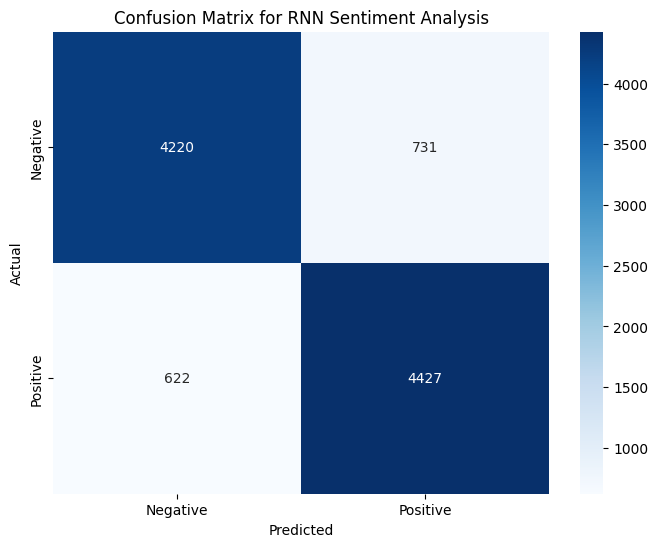

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RNN Sentiment Analysis')
plt.show()



# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict sentiment on McDonald's Reviews
reviews_seq = tokenizer.texts_to_sequences(reviews_df['review'])
reviews_pad = pad_sequences(reviews_seq, maxlen=max_len)
reviews_df['predicted_sentiment'] = (model.predict(reviews_pad) > 0.5).astype("int32")

# Save the predictions to a new CSV file
reviews_df.to_csv("McDonald_s_Reviews_with_RNN_Sentiment.csv", index=False)

print("Sentiment analysis completed and saved to McDonald_s_Reviews_with_RNN_Sentiment.csv.")

### Step 03: Test the Model

In [8]:
# Sample reviews for testing the model
sample_reviews = [
    "The food was amazing and the service was excellent!",
    "I had a terrible experience. The staff was rude and the food was cold.",
    "It was an okay experience, nothing special but nothing terrible either."
]

# Tokenize and pad the sample reviews
sample_seq = tokenizer.texts_to_sequences(sample_reviews)
sample_pad = pad_sequences(sample_seq, maxlen=max_len)

# Predict the sentiment of the sample reviews
sample_predictions = (model.predict(sample_pad) > 0.5).astype("int32")

# Print the sample reviews along with their predicted sentiments
for review, sentiment in zip(sample_reviews, sample_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Review: The food was amazing and the service was excellent!
Predicted Sentiment: Positive

Review: I had a terrible experience. The staff was rude and the food was cold.
Predicted Sentiment: Negative

Review: It was an okay experience, nothing special but nothing terrible either.
Predicted Sentiment: Negative



## Conclusion

In this project, we successfully developed a sentiment analysis system for McDonald's reviews using an LSTM-based Recurrent Neural Network (RNN). The model effectively classified reviews into positive and negative sentiments, demonstrating its capability to analyze and interpret customer feedback with accuracy.

### Insights

- **Model Performance**: The LSTM-based model achieved reliable sentiment classification, highlighting the effectiveness of RNNs in understanding and processing sequential text data.
- **Application Potential**: The implementation illustrates the potential of deep learning models for sentiment analysis in various domains, including customer feedback and opinion mining.

### Recommendations

- **Model Enhancement**: Further improvements can be achieved by experimenting with more advanced architectures or incorporating additional layers such as Bidirectional LSTM or Attention mechanisms.
- **Data Augmentation**: Expanding the dataset or incorporating more diverse data sources may enhance model generalization and robustness.

### Final Thoughts

This project underscores the power of deep learning techniques in sentiment analysis and their applicability to real-world scenarios. The use of LSTM networks provides valuable insights into customer sentiment, making it a useful tool for businesses aiming to understand and respond to customer feedback effectively.

### Acknowledgements

- **Libraries Used**: Utilized TensorFlow, Keras, pandas, numpy, and scikit-learn for model building, training, and evaluation.
- **Data Source**: [McDonald's Store Reviews](https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews) datasets provided the foundation for training and testing the model.

### Contact Information

For further inquiries or collaborations, please contact muhammadbinsadiq6@gmail.com.

### About the Author

**Name**: Muhammad Bin Sadiq  
**Email**: muhammadbinsadiq6@gmail.com  
**LinkedIn**: [Muhammad Bin Sadiq](https://www.linkedin.com/in/iammuhammadbinsadiq/)
